In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import yfinance as yfin
import datetime as dt
from pandas_datareader import data as pdr
from statsmodels.tsa.api import VAR

# Importing data

In [2]:
start = dt.date(2017,12,31)
end = dt.date(2022,12,31)

tickers = ["MSFT", "^GSPC", "AAPL", "AMZN"]


yfin.pdr_override()
df = pd.DataFrame(pdr.get_data_yahoo(tickers, start, end)["Adj Close"])

[*********************100%***********************]  4 of 4 completed


In [3]:
df.index = pd.DatetimeIndex(df.index).to_period('b')

In [4]:
df

,AAPL,AMZN,MSFT,^GSPC
Date,,,,
2018-01-02,40.722870,59.450500,80.229004,2695.810059
2018-01-03,40.715782,60.209999,80.602394,2713.060059
2018-01-04,40.904900,60.479500,81.311806,2723.989990
2018-01-05,41.370621,61.457001,82.319901,2743.149902
2018-01-08,41.216953,62.343498,82.403915,2747.709961
...,...,...,...,...
2022-12-23,131.127045,85.250000,236.631805,3844.820068
2022-12-27,129.307251,83.040001,234.877350,3829.250000
2022-12-28,125.339417,81.820000,232.468719,3783.219971


# Running the model

In [5]:
model_var = VAR(df)
model_var.select_order(15)
results_model_var = model_var.fit(ic ="aic")

In [6]:
results_model_var.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Tue, 30, Jan, 2024
Time:                     20:18:29
--------------------------------------------------------------------
No. of Equations:         4.00000    BIC:                    11.5569
Nobs:                     1249.00    HQIC:                   11.1365
Log likelihood:          -13721.6    FPE:                    53283.6
AIC:                      10.8833    Det(Omega_mle):         46825.8
--------------------------------------------------------------------
Results for equation AAPL
               coefficient       std. error           t-stat            prob
----------------------------------------------------------------------------
const             0.625275         0.737505            0.848           0.397
L1.AAPL           0.992213         0.048348           20.522           0.000
L1.AMZN           0.030006         0.032749            0.916           0.360


# Forecasting

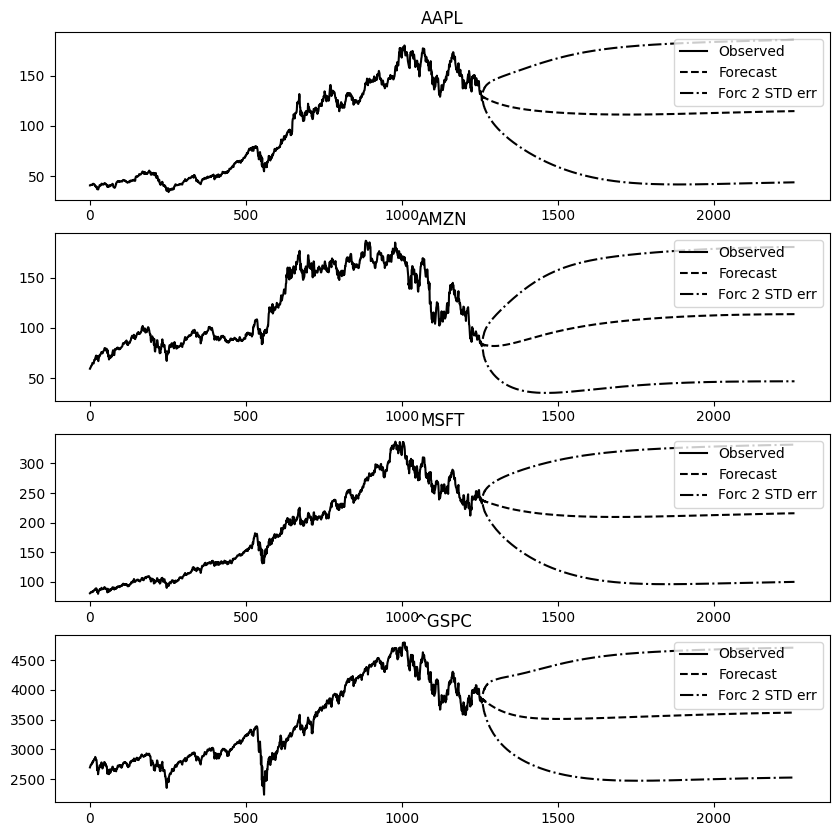

In [16]:
results_model_var.plot_forecast(1000)
plt.show()